# PSET1 - Object Oriented Programming

This problem set has only one part.

## Problem description:

You work on a team of data scientists that regularly perform analysis and create many charts. Your boss has asked you to create a reusable piece of code that can perform most of this plotting without having to retype a lot of code. 

class called **Plot** that **takes my dataframe as input**. Here are the plotting functions it should have:

- **Box plots of all numeric features** - This function should find all the numeric features in your dataframe and construct a faceted plot (a grid or subplots). Each subplotplot should have the feature labeled and the larger plot should have a title.

- **Single scatter plot of two columns** - This function should take 2 column names and build a scatter plot for them. The axes labels and title should be auto generated.

- **Correlation with extras** - This function should plot a correlation matrix with histograms plotted along the diagonal. In addition to the correlation matrix, the function should tell which columns were not able to be included in the correlation matrix. 


useD Matplotlib, Plotly, or Seaborn for this PSET. Also, each functioN included **at least a basic docstring**.

## Demostrate completion:

In order to complete the PSET needed to create my Class and then **demonstrate its usage**. Once I have created my class and functions, I demonstrated their usage on the Titanic dataset.


## Libraries

In [1]:
import numpy as np 
import pandas as pd 
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

## Data import

In [2]:
titanic = pd.read_csv('data/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
numeric_columns = titanic._get_numeric_data()
numeric_columns

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


## Box plots of all numeric features

In [4]:
def box_plot(data):
        
        numeric_columns = titanic._get_numeric_data()
        
         
        numeric_columns = [x for x in numeric_columns if x in ['Pclass','Age', 'Fare']]
        
        height = len(numeric_columns)
        width = len(numeric_columns) - 1
        fig, axes = plt.subplots(height, width)
        colx_index = 0
        for colx in numeric_columns:
            coly_index = 0
            for coly in numeric_columns:
                if colx == coly:
                    continue
                ax = sns.boxplot(x=colx, y=coly, data=data, ax=axes[colx_index, coly_index])
                coly_index = coly_index + 1
            colx_index = colx_index + 1
        fig.tight_layout()
        return fig


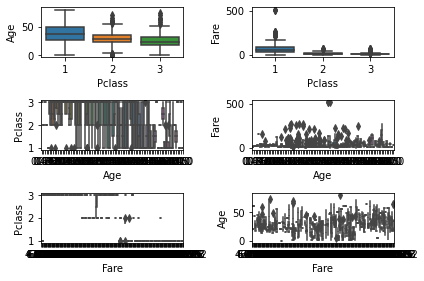

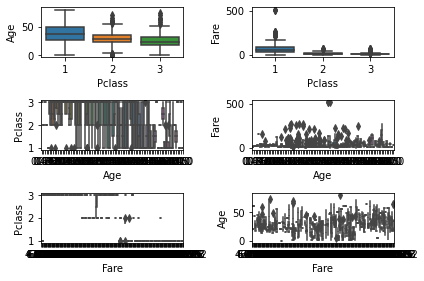

In [5]:
result = box_plot(titanic)
result

## Single scatter plot of two columns

In [6]:
def scatter_plot(data, x, y):   
        return sns.scatterplot(data=data, x=x, y=y)

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

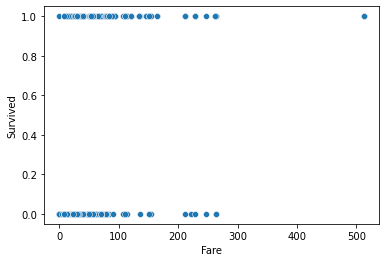

In [9]:
result1 = scatter_plot(titanic, 'Fare', 'Survived')
result1

## Correlation with extras

In [13]:
def correlation(data):
        correlation = sns.pairplot(data,diag_kind="hist",height=1.5)
        for column in titanic:
            if type(column) is not int and float:
                not_num = data.select_dtypes(include=[np.object]).columns
                print('Columns not included in the plot:', not_num)
                return correlation

Columns not included in the plot: Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


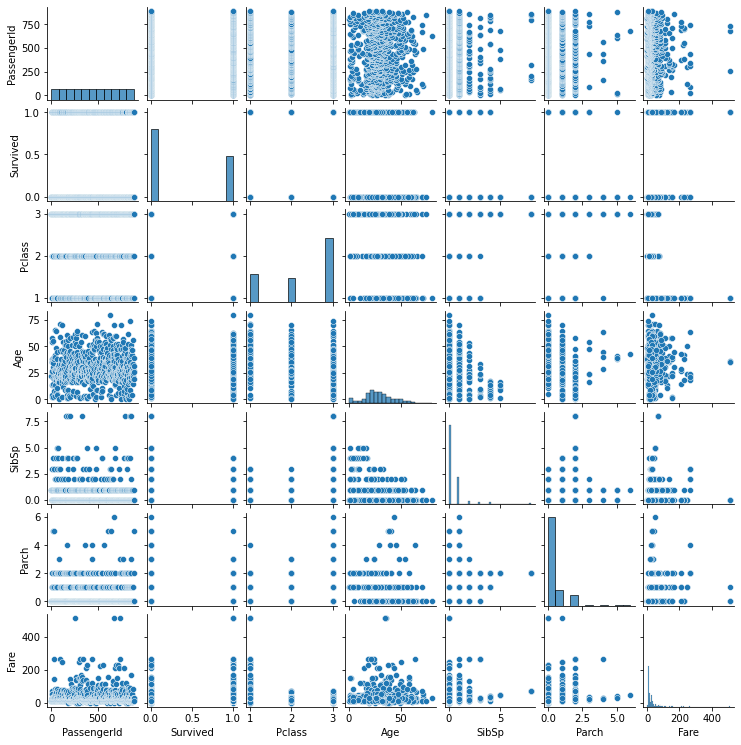

In [14]:
correlation(titanic)